In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from six.moves import urllib
import zipfile
from scipy import stats

In [2]:
cyc = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Cycle_time_per_station')
dtf = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Downtime_freq')
dtt = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Downtime_time')

In [3]:
cyc.head()

,Unnamed: 0,station,production_line,Sample,Cycle_time
0,0,1.0,1.0,Unnamed: 6,96.200000
1,1,2.0,1.0,Unnamed: 6,22.200000
2,2,3.0,2.0,Unnamed: 6,7.250000
3,3,4.0,2.0,Unnamed: 6,11.666667
4,4,5.0,2.0,Unnamed: 6,75.250000


In [4]:
cyc['Ct_min'] = cyc['Cycle_time']/60
cyc.head()

,Unnamed: 0,station,production_line,Sample,Cycle_time,Ct_min
0,0,1.0,1.0,Unnamed: 6,96.200000,1.603333
1,1,2.0,1.0,Unnamed: 6,22.200000,0.370000
2,2,3.0,2.0,Unnamed: 6,7.250000,0.120833
3,3,4.0,2.0,Unnamed: 6,11.666667,0.194444
4,4,5.0,2.0,Unnamed: 6,75.250000,1.254167


In [5]:
cyc['Ct_hr'] = cyc['Ct_min']/60
cyc.head()

,Unnamed: 0,station,production_line,Sample,Cycle_time,Ct_min,Ct_hr
0,0,1.0,1.0,Unnamed: 6,96.200000,1.603333,0.026722
1,1,2.0,1.0,Unnamed: 6,22.200000,0.370000,0.006167
2,2,3.0,2.0,Unnamed: 6,7.250000,0.120833,0.002014
3,3,4.0,2.0,Unnamed: 6,11.666667,0.194444,0.003241
4,4,5.0,2.0,Unnamed: 6,75.250000,1.254167,0.020903


In [6]:
dtf.head()

,Unnamed: 0,station,station_no.,Date,Downtime,Year
0,0,station 1,1,2018-01-01,8,2018
1,1,station 2,2,2018-01-01,8,2018
2,2,station 3,3,2018-01-01,4,2018
3,3,station 4,4,2018-01-01,7,2018
4,4,station 5,5,2018-01-01,6,2018


In [7]:
dtt.head()

,Unnamed: 0,station,station_no.,variable,value
0,0,station 1,1,sample 1,2942
1,1,station 2,2,sample 1,605
2,2,station 3,3,sample 1,717
3,3,station 4,4,sample 1,1014
4,4,station 5,5,sample 1,1743


In [8]:
dtt['dt_min'] = dtt['value']/60
dtt.head()

,Unnamed: 0,station,station_no.,variable,value,dt_min
0,0,station 1,1,sample 1,2942,49.033333
1,1,station 2,2,sample 1,605,10.083333
2,2,station 3,3,sample 1,717,11.950000
3,3,station 4,4,sample 1,1014,16.900000
4,4,station 5,5,sample 1,1743,29.050000


In [9]:
dtt['dt_hr'] = dtt['dt_min']/60
dtt.head()

,Unnamed: 0,station,station_no.,variable,value,dt_min,dt_hr
0,0,station 1,1,sample 1,2942,49.033333,0.817222
1,1,station 2,2,sample 1,605,10.083333,0.168056
2,2,station 3,3,sample 1,717,11.950000,0.199167
3,3,station 4,4,sample 1,1014,16.900000,0.281667
4,4,station 5,5,sample 1,1743,29.050000,0.484167


In [10]:
cyc.shape

(5200, 7)

In [11]:
dtf.shape

(1248, 6)

In [12]:
dtt.shape

(5200, 7)

## Distribution of Cycle Time per station

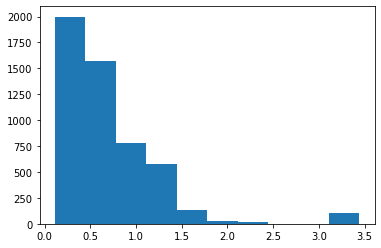

In [13]:
#For Cycle time
plt.hist(cyc['Ct_min'])
plt.show()

## Distribution of Downtime Freq

In [14]:
from scipy.stats import norm

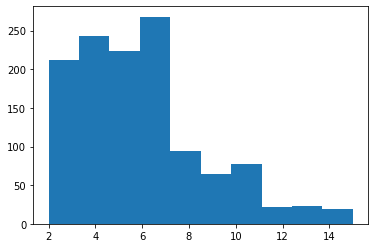

In [15]:
#For Downtime freq
plt.hist(dtf['Downtime'])
plt.show()

## Distribution of Downtime times

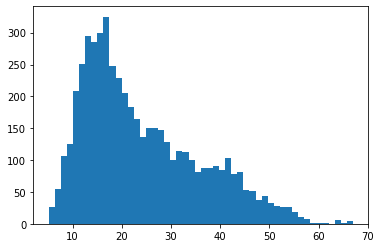

In [16]:
plt.hist(dtt['dt_min'], bins=50)
plt.show()

# Kolmogorov–Smirnov test and check the goodness of fit:

In [17]:
#For the downtime times
dist = getattr(stats, 'norm')
parameters = dist.fit(dtt['dt_min'])
print(parameters)

(24.11834294871795, 11.90926796586648)


In [18]:
stats.kstest(dtt['dt_min'], "norm", parameters)

KstestResult(statistic=0.10976443402036751, pvalue=5.093714208817535e-55)

Since the downtime times contains more than 50 data points each one. We want a significance level (α) of 0.05 , so we look at the last row of the third column. The critical value is 1.36, which is more than our test statistic (0.10976443402036751). So we can say with 95% confidence that the our data comes from a normal distribution.

In [19]:
#For Cycle Time
dist = getattr(stats, 'norm')
parameters = dist.fit(cyc['Ct_min'])
print(parameters)

(0.6905975819215512, 0.5272520850307967)


In [20]:
stats.kstest(cyc['Ct_min'], "norm", parameters)

KstestResult(statistic=0.14468839619988116, pvalue=1.8321440327897125e-95)

Since the Cycle time contains more than 50 data points each one. We want a significance level (α) of 0.05 , so we look at the last row of the third column. The critical value is 1.36, which is more than our test statistic (0.14468839619988116). So we can say with 95% confidence that the our data comes from a normal distribution.

In [21]:
#For Downtime freq
dist = getattr(stats, 'norm')
parameters = dist.fit(dtf['Downtime'])
print(parameters)

(5.919070512820513, 2.745746436768687)


In [22]:
stats.kstest(dtf['Downtime'], "norm", parameters)

KstestResult(statistic=0.17515431607270726, pvalue=5.878933010146392e-34)

Since the downtime freq contains more than 50 data points each one. We want a significance level (α) of 0.05 , so we look at the last row of the third column. The critical value is 1.36, which is more than our test statistic (0.17515431607270726). So we can say with 95% confidence that the our data comes from a normal distribution.

In [ ]:
#Cycle time test
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(cyc['Ct_min'])
    a = stats.kstest(cyc['Ct_min'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

#### It seems the best fitted distribution of Cycle time is genexpon distribution. 

In [ ]:
# Downtime time test
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(dtt['dt_min'])
    a = stats.kstest(dtt['dt_min'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

#### It seems the best fitted distribution of the time of downtime is genexpon distribution.

In [ ]:
# Downtime freq test
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(dtf['Downtime'])
    a = stats.kstest(dtf['Downtime'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

#### It seems the best fitted distribution of Downtime frequency is invgauss distribution.